In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('bank-additional-full-cleaned.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0


# 1. Data Prerpocessing

In machine learning model, there will be steps for preprocess data, feature enginering (such as encode, etc...)

In [3]:
df['pdays'] = df['pdays'].replace(999,-1)

In [4]:
df['marital'] = df['marital'].replace('unknown', np.nan)
df['housing'] = df['housing'].replace('unknown', np.nan)
df['loan'] = df['loan'].replace('unknown', np.nan)
df['default'] = df['default'].replace('unknown', np.nan)

In [5]:
df.isna().sum()

age                  0
job                  0
marital             80
education            0
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
deposit              0
dtype: int64

<Axes: >

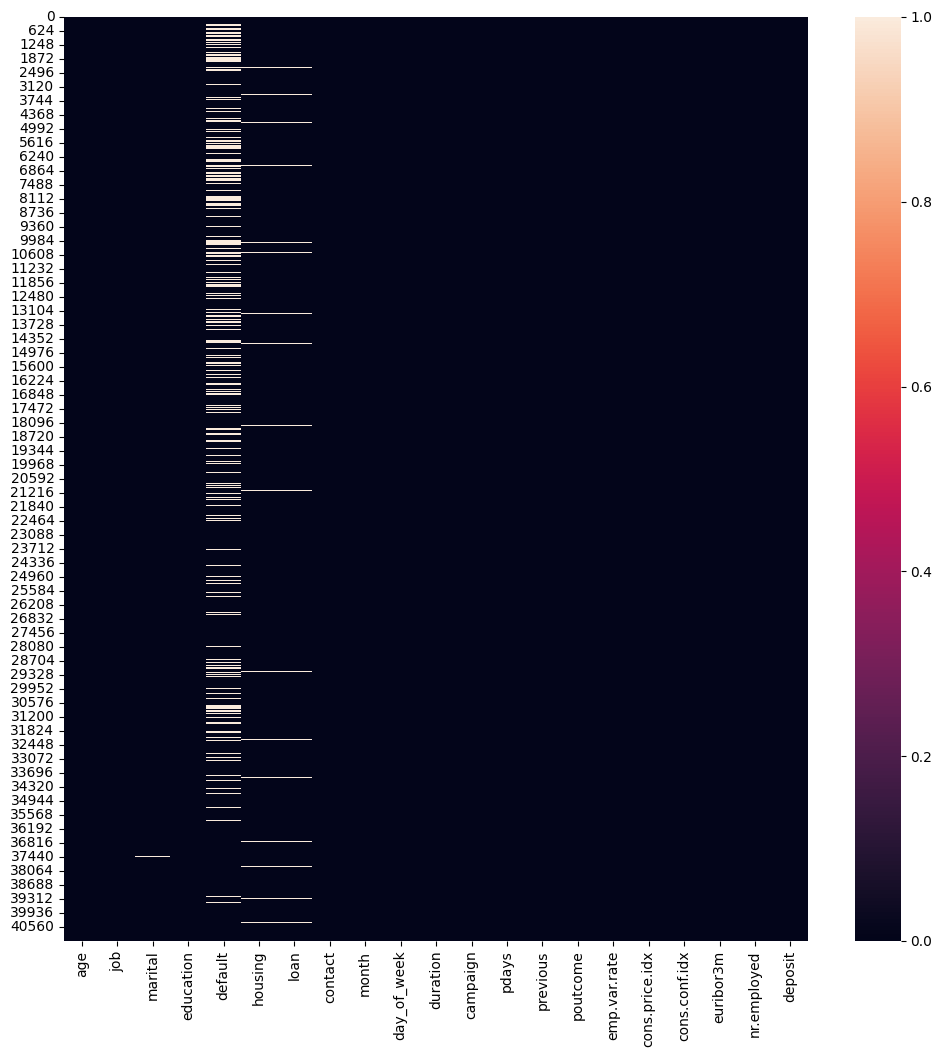

In [6]:
column_names = df.columns.tolist()

plt.figure(figsize=(12,12))
sns.heatmap(df[column_names].isna())

# Benchmarking Model Without Resampling Method

In [7]:
from pycaret.datasets import get_data
from pycaret.classification import *
s = setup(df, target = 'deposit', session_id = 42,ordinal_features=False,normalize=True,encoding_method='one_hot',max_encoding_ohe= 25, normalize_method='robust', categorical_imputation= 'mode',fix_imbalance=False,fix_imbalance_method=None)

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(41176, 21)"
4,Transformed data shape,"(41176, 56)"
5,Transformed train set shape,"(28823, 56)"
6,Transformed test set shape,"(12353, 56)"
7,Ordinal features,4
8,Numeric features,10
9,Categorical features,10


In [8]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\Novaldi\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'duration', 'campaign',
                                             'pdays', 'previous',
                                             'emp.var.rate', 'cons.price.idx',
                                             'cons.conf.idx', 'euribor3m',
                                             'nr.employed'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_em...
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=RobustScaler(copy=True,
                                                             quantile_range=(25.0,
                                                                             75.0),
                                                             unit_variance=False,
                                                             with_centering=True,
                                                             with_scaling=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+')))],
         verbose=False)

In [9]:
best = compare_models(cross_validation=True, include = ['lr', 'dt', 'rf','knn','ada','gbc','xgboost','catboost','lightgbm'], sort=('Prec.'))

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:31:59
Status,. . . . . . . . . . . . . . . . . .,Initializing CV
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9133,0.9399,0.4666,0.6648,0.5479,0.5017,0.5115,0.2680
lr,Logistic Regression,0.9105,0.9322,0.4182,0.6632,0.5128,0.4663,0.4815,0.7350
gbc,Gradient Boosting Classifier,0.9159,0.9458,0.5155,0.6632,0.5799,0.5340,0.5393,0.5230
ada,Ada Boost Classifier,0.9089,0.9378,0.4053,0.6550,0.5007,0.4536,0.4695,0.2250
lightgbm,Light Gradient Boosting Machine,0.9159,0.9497,0.5371,0.6545,0.5899,0.5436,0.5469,0.2450
catboost,CatBoost Classifier,0.9150,0.9487,0.5251,0.6523,0.5817,0.5350,0.5390,2.4960
xgboost,Extreme Gradient Boosting,0.9144,0.9468,0.5386,0.6436,0.5863,0.5390,0.5418,0.7070
knn,K Neighbors Classifier,0.9036,0.8718,0.4324,0.6003,0.5026,0.4508,0.4583,0.2590
dt,Decision Tree Classifier,0.8885,0.7260,0.5162,0.5055,0.5104,0.4475,0.4478,0.3810


In [10]:
df_pycaret_noresampling = pull()

In [11]:
df_pycaret_noresampling.head(3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9133,0.9399,0.4666,0.6648,0.5479,0.5017,0.5115,0.268
lr,Logistic Regression,0.9105,0.9322,0.4182,0.6632,0.5128,0.4663,0.4815,0.735
gbc,Gradient Boosting Classifier,0.9159,0.9458,0.5155,0.6632,0.5799,0.5340,0.5393,0.523


# Benchmarking Model Random Over Sampling Method

In [12]:
from pycaret.datasets import get_data
from pycaret.classification import *
s = setup(df, target = 'deposit', session_id = 42,ordinal_features=False,normalize=True,encoding_method='one_hot',max_encoding_ohe= 25, normalize_method='robust', categorical_imputation= 'mode',fix_imbalance=True,fix_imbalance_method='randomoversampler')

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(41176, 21)"
4,Transformed data shape,"(63505, 56)"
5,Transformed train set shape,"(51152, 56)"
6,Transformed test set shape,"(12353, 56)"
7,Ordinal features,4
8,Numeric features,10
9,Categorical features,10


In [13]:
best = compare_models(cross_validation=True, include = ['lr', 'dt', 'rf','knn','ada','gbc','xgboost','catboost','lightgbm'], sort=('Prec.'))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9111,0.9422,0.5969,0.6080,0.6022,0.5522,0.5523,0.4660
dt,Decision Tree Classifier,0.8921,0.7222,0.5029,0.5223,0.5123,0.4517,0.4519,0.1280
xgboost,Extreme Gradient Boosting,0.8873,0.9427,0.8266,0.5001,0.6230,0.5615,0.5861,0.9800
catboost,CatBoost Classifier,0.8848,0.9465,0.8636,0.4937,0.6281,0.5659,0.5970,3.1340
lightgbm,Light Gradient Boosting Machine,0.8754,0.9490,0.9067,0.4726,0.6213,0.5554,0.5977,0.3150
ada,Ada Boost Classifier,0.8698,0.9377,0.8759,0.4597,0.6027,0.5338,0.5737,0.3620
lr,Logistic Regression,0.8596,0.9356,0.8774,0.4390,0.5850,0.5116,0.5562,0.5450
gbc,Gradient Boosting Classifier,0.8559,0.9454,0.9218,0.4344,0.5905,0.5164,0.5703,0.9500
knn,K Neighbors Classifier,0.8533,0.8339,0.7071,0.4124,0.5208,0.4413,0.4637,0.3920


In [14]:
df_pycaret_ROS = pull()

In [15]:
df_pycaret_ROS.head(3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9111,0.9422,0.5969,0.6080,0.6022,0.5522,0.5523,0.466
dt,Decision Tree Classifier,0.8921,0.7222,0.5029,0.5223,0.5123,0.4517,0.4519,0.128
xgboost,Extreme Gradient Boosting,0.8873,0.9427,0.8266,0.5001,0.6230,0.5615,0.5861,0.980


# Benchmarking Model Resample SMOTE

In [16]:
from pycaret.datasets import get_data
from pycaret.classification import *
s = setup(df, target = 'deposit', session_id = 42,ordinal_features=False,normalize=True,encoding_method='one_hot',max_encoding_ohe= 25, normalize_method='robust', categorical_imputation= 'mode',fix_imbalance=True,fix_imbalance_method='smote')

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(41176, 21)"
4,Transformed data shape,"(63505, 56)"
5,Transformed train set shape,"(51152, 56)"
6,Transformed test set shape,"(12353, 56)"
7,Ordinal features,4
8,Numeric features,10
9,Categorical features,10


In [17]:
best = compare_models(cross_validation=True, include = ['lr', 'dt', 'rf','knn','ada','gbc','xgboost','catboost','lightgbm'], sort=('Prec.'))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9160,0.9475,0.5540,0.6491,0.5976,0.5511,0.5533,4.6390
rf,Random Forest Classifier,0.9114,0.9394,0.4675,0.6483,0.5432,0.4956,0.5037,0.9340
lightgbm,Light Gradient Boosting Machine,0.9151,0.9482,0.5584,0.6420,0.5971,0.5499,0.5517,0.3840
xgboost,Extreme Gradient Boosting,0.9121,0.9440,0.5390,0.6287,0.5801,0.5314,0.5335,1.9790
gbc,Gradient Boosting Classifier,0.9094,0.9417,0.5864,0.6004,0.5932,0.5422,0.5424,3.7680
ada,Ada Boost Classifier,0.9063,0.9300,0.5380,0.5933,0.5640,0.5117,0.5126,1.2280
dt,Decision Tree Classifier,0.8872,0.7301,0.5272,0.4993,0.5127,0.4490,0.4493,0.5100
knn,K Neighbors Classifier,0.8733,0.8335,0.5876,0.4530,0.5111,0.4398,0.4450,1.0870
lr,Logistic Regression,0.8623,0.9354,0.8700,0.4439,0.5876,0.5153,0.5575,1.3670


In [18]:
df_pycaret_smote = pull()

In [19]:
df_pycaret_smote.head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9160,0.9475,0.5540,0.6491,0.5976,0.5511,0.5533,4.639
rf,Random Forest Classifier,0.9114,0.9394,0.4675,0.6483,0.5432,0.4956,0.5037,0.934
lightgbm,Light Gradient Boosting Machine,0.9151,0.9482,0.5584,0.6420,0.5971,0.5499,0.5517,0.384
xgboost,Extreme Gradient Boosting,0.9121,0.9440,0.5390,0.6287,0.5801,0.5314,0.5335,1.979
gbc,Gradient Boosting Classifier,0.9094,0.9417,0.5864,0.6004,0.5932,0.5422,0.5424,3.768


# Benchmarking Model Resample SMOTEENN

In [20]:
from pycaret.datasets import get_data
from pycaret.classification import *
s = setup(df, target = 'deposit', session_id = 42,ordinal_features=False,normalize=True,encoding_method='one_hot',max_encoding_ohe= 25, normalize_method='robust', categorical_imputation= 'mode',fix_imbalance=True,fix_imbalance_method='smoteenn')

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(41176, 21)"
4,Transformed data shape,"(56533, 56)"
5,Transformed train set shape,"(44180, 56)"
6,Transformed test set shape,"(12353, 56)"
7,Ordinal features,4
8,Numeric features,10
9,Categorical features,10


In [21]:
best = compare_models(cross_validation=True, include = ['lr', 'dt', 'rf','knn','ada','gbc','xgboost','catboost','lightgbm'], sort=('Prec.'))

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:45:13
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8929,0.9475,0.8571,0.5153,0.6435,0.5851,0.6114,6.3780
lightgbm,Light Gradient Boosting Machine,0.8909,0.9463,0.8592,0.5097,0.6397,0.5803,0.6079,2.9110
xgboost,Extreme Gradient Boosting,0.8904,0.9448,0.8543,0.5085,0.6374,0.5777,0.6048,3.7510
rf,Random Forest Classifier,0.8881,0.9418,0.8398,0.5025,0.6286,0.5676,0.5937,3.8040
ada,Ada Boost Classifier,0.8808,0.9314,0.8090,0.4830,0.6047,0.5397,0.5648,6.3090
gbc,Gradient Boosting Classifier,0.8784,0.9413,0.8632,0.4786,0.6156,0.5504,0.5843,4.0510
dt,Decision Tree Classifier,0.8776,0.8486,0.8112,0.4749,0.5990,0.5326,0.5593,2.4020
knn,K Neighbors Classifier,0.8676,0.8636,0.7096,0.4456,0.5472,0.4744,0.4921,9.3930
lr,Logistic Regression,0.8368,0.9350,0.9205,0.4023,0.5598,0.4780,0.5398,4.5490


In [22]:
df_pycaret_smoteenn = pull()

In [23]:
df_pycaret_smoteenn.head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8929,0.9475,0.8571,0.5153,0.6435,0.5851,0.6114,6.378
lightgbm,Light Gradient Boosting Machine,0.8909,0.9463,0.8592,0.5097,0.6397,0.5803,0.6079,2.911
xgboost,Extreme Gradient Boosting,0.8904,0.9448,0.8543,0.5085,0.6374,0.5777,0.6048,3.751
rf,Random Forest Classifier,0.8881,0.9418,0.8398,0.5025,0.6286,0.5676,0.5937,3.804
ada,Ada Boost Classifier,0.8808,0.9314,0.8090,0.4830,0.6047,0.5397,0.5648,6.309


# Benchmarking Model Resample Random Under Sampler

In [24]:
from pycaret.datasets import get_data
from pycaret.classification import *
s = setup(df, target = 'deposit', session_id = 42,ordinal_features=False,normalize=True,encoding_method='one_hot',max_encoding_ohe= 25, normalize_method='robust', categorical_imputation= 'mode',fix_imbalance=True,fix_imbalance_method='randomundersampler')

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(41176, 21)"
4,Transformed data shape,"(18847, 56)"
5,Transformed train set shape,"(6494, 56)"
6,Transformed test set shape,"(12353, 56)"
7,Ordinal features,4
8,Numeric features,10
9,Categorical features,10


In [25]:
best = compare_models(cross_validation=True, include = ['lr', 'dt', 'rf','knn','ada','gbc','xgboost','catboost','lightgbm'], sort=('Prec.'))

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:53:37
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8656,0.9338,0.8722,0.4507,0.5941,0.5233,0.5644,0.1160
catboost,CatBoost Classifier,0.8590,0.9453,0.9282,0.4408,0.5976,0.5250,0.5787,0.6990
lightgbm,Light Gradient Boosting Machine,0.8568,0.9437,0.9307,0.4367,0.5944,0.5209,0.5760,0.2210
xgboost,Extreme Gradient Boosting,0.8570,0.9397,0.9162,0.4363,0.5909,0.5172,0.5697,0.1780
lr,Logistic Regression,0.8577,0.9344,0.8728,0.4350,0.5804,0.5062,0.5508,0.1110
gbc,Gradient Boosting Classifier,0.8518,0.9435,0.9276,0.4275,0.5852,0.5095,0.5663,0.1800
rf,Random Forest Classifier,0.8496,0.9394,0.9258,0.4237,0.5813,0.5047,0.5621,0.1290
knn,K Neighbors Classifier,0.8414,0.8938,0.8189,0.4006,0.5379,0.4555,0.4981,0.1240
dt,Decision Tree Classifier,0.8369,0.8276,0.8155,0.3924,0.5298,0.4455,0.4892,0.0700


In [26]:
df_pycaret_RUS = pull()

In [27]:
df_pycaret_RUS.head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8656,0.9338,0.8722,0.4507,0.5941,0.5233,0.5644,0.116
catboost,CatBoost Classifier,0.8590,0.9453,0.9282,0.4408,0.5976,0.5250,0.5787,0.699
lightgbm,Light Gradient Boosting Machine,0.8568,0.9437,0.9307,0.4367,0.5944,0.5209,0.5760,0.221
xgboost,Extreme Gradient Boosting,0.8570,0.9397,0.9162,0.4363,0.5909,0.5172,0.5697,0.178
lr,Logistic Regression,0.8577,0.9344,0.8728,0.4350,0.5804,0.5062,0.5508,0.111


# Benchmarking Model Resample NearMiss

In [28]:
from pycaret.datasets import get_data
from pycaret.classification import *
s = setup(df, target = 'deposit', session_id = 42,ordinal_features=False,normalize=True,encoding_method='one_hot',max_encoding_ohe= 25, normalize_method='robust', categorical_imputation= 'mode',fix_imbalance=True,fix_imbalance_method='nearmiss')

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(41176, 21)"
4,Transformed data shape,"(18847, 56)"
5,Transformed train set shape,"(6494, 56)"
6,Transformed test set shape,"(12353, 56)"
7,Ordinal features,4
8,Numeric features,10
9,Categorical features,10


In [29]:
best = compare_models(cross_validation=True, include = ['lr', 'dt', 'rf','knn','ada','gbc','xgboost','catboost','lightgbm'], sort=('Prec.'))

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:54:42
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8759,0.9166,0.7367,0.4680,0.5723,0.5039,0.5218,0.1860
lr,Logistic Regression,0.8757,0.9132,0.7123,0.4666,0.5637,0.4949,0.5101,0.1680
knn,K Neighbors Classifier,0.7612,0.7693,0.6489,0.2689,0.3801,0.2626,0.3017,0.1890
lightgbm,Light Gradient Boosting Machine,0.7059,0.8065,0.7733,0.2578,0.3841,0.2575,0.3191,0.3210
rf,Random Forest Classifier,0.7151,0.8006,0.7579,0.2493,0.3751,0.2475,0.3117,0.2050
xgboost,Extreme Gradient Boosting,0.4991,0.7098,0.7687,0.1580,0.2611,0.0907,0.1505,0.2520
gbc,Gradient Boosting Classifier,0.4842,0.6424,0.7474,0.1475,0.2464,0.0717,0.1267,0.2480
catboost,CatBoost Classifier,0.4269,0.6401,0.7644,0.1362,0.2312,0.0494,0.0973,0.7570
dt,Decision Tree Classifier,0.3471,0.5087,0.7173,0.1152,0.1985,0.0054,0.0118,0.1440


In [30]:
df_pycaret_nearmiss = pull()

In [31]:
df_pycaret_nearmiss.head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8759,0.9166,0.7367,0.4680,0.5723,0.5039,0.5218,0.186
lr,Logistic Regression,0.8757,0.9132,0.7123,0.4666,0.5637,0.4949,0.5101,0.168
knn,K Neighbors Classifier,0.7612,0.7693,0.6489,0.2689,0.3801,0.2626,0.3017,0.189
lightgbm,Light Gradient Boosting Machine,0.7059,0.8065,0.7733,0.2578,0.3841,0.2575,0.3191,0.321
rf,Random Forest Classifier,0.7151,0.8006,0.7579,0.2493,0.3751,0.2475,0.3117,0.205


In [35]:
df_pycaret_noresampling['resample method'] = 'no resample'
df_pycaret_ROS['resample method'] = 'ROS'
df_pycaret_smote['resample method'] = 'smote'
df_pycaret_smoteenn['resample method'] = 'smoteenn'
df_pycaret_RUS['resample method'] = 'RUS'
df_pycaret_nearmiss['resample method'] = 'nearmiss'


In [39]:
df_pycaret_comparison = pd.concat([df_pycaret_noresampling, df_pycaret_ROS, df_pycaret_smote,df_pycaret_smoteenn,df_pycaret_RUS,df_pycaret_nearmiss], ignore_index=True)
df_pycaret_comparison = df_pycaret_comparison.drop(['Kappa', 'MCC', 'TT (Sec)'], axis=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,resample method
0,Random Forest Classifier,0.9133,0.9399,0.4666,0.6648,0.5479,no resample
1,Logistic Regression,0.9105,0.9322,0.4182,0.6632,0.5128,no resample
2,Gradient Boosting Classifier,0.9159,0.9458,0.5155,0.6632,0.5799,no resample
3,Ada Boost Classifier,0.9089,0.9378,0.4053,0.6550,0.5007,no resample
4,Light Gradient Boosting Machine,0.9159,0.9497,0.5371,0.6545,0.5899,no resample
5,CatBoost Classifier,0.9150,0.9487,0.5251,0.6523,0.5817,no resample
6,Extreme Gradient Boosting,0.9144,0.9468,0.5386,0.6436,0.5863,no resample
7,K Neighbors Classifier,0.9036,0.8718,0.4324,0.6003,0.5026,no resample
8,Decision Tree Classifier,0.8885,0.7260,0.5162,0.5055,0.5104,no resample
9,Random Forest Classifier,0.9111,0.9422,0.5969,0.6080,0.6022,ROS


In [40]:
df_pycaret_comparison.sort_values(by='Prec.', ascending=False).head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,resample method
0,Random Forest Classifier,0.9133,0.9399,0.4666,0.6648,0.5479,no resample
2,Gradient Boosting Classifier,0.9159,0.9458,0.5155,0.6632,0.5799,no resample
1,Logistic Regression,0.9105,0.9322,0.4182,0.6632,0.5128,no resample
3,Ada Boost Classifier,0.9089,0.9378,0.4053,0.6550,0.5007,no resample
4,Light Gradient Boosting Machine,0.9159,0.9497,0.5371,0.6545,0.5899,no resample
